# 1. 데이터

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 24.2 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42014 sha256=281cc4dd5b8567abf92e2932dd250fe37150242f50fbee2b540937081ebeeb6f
  Stored in directory: /root/.cache/pip/wheels/c5/94/da/41abe415f64706710726291086a814dd8b9e0dab1c491ef6ed
Successfully built factor_analyzer


In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer

In [5]:
data_2201 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202201.csv', index_col = False)
data_2202 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202202.csv', index_col = False)
data_2203 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202203.csv', index_col = False)
data_2204 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202204.csv', index_col = False)
data_2205 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202205.csv', index_col = False)
data_2206 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202206.csv', index_col = False)
data_2207 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202207.csv', index_col = False)
data_2208 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202208.csv', index_col = False)
data_2209 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202209.csv', index_col = False)
data_2210 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202210.csv', index_col = False)
data_2211 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202211.csv', index_col = False)
data_2212 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202212.csv', index_col = False)
# 1시간 단위 행정동 별 생활인구 1년치 데이터

In [6]:
data_list = [data_2201,data_2202,data_2203,data_2204,data_2205,data_2206,data_2207,data_2208,data_2209,data_2210,data_2211,data_2212]

In [7]:
#여러개의 데이터프레임 하나로 합치기기
data_22 = pd.concat(data_list, axis = 0)
data_22.reset_index(inplace = True , drop = True)

data_22 = pd.DataFrame(data_22)

In [8]:
data_22

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20220101,0,11200550,15915.9153,255.4393,116.4503,356.6989,1515.4383,1407.4535,639.5899,...,1138.1167,506.7359,572.9357,342.8503,546.2349,393.6438,400.2660,414.5880,299.1094,871.5197
1,20220101,0,11320515,20067.0536,761.0144,364.8200,549.2125,597.7672,650.3921,666.1416,...,761.3329,684.2883,771.4230,752.9131,820.4530,782.0723,951.6618,914.5524,636.0850,1497.8745
2,20220101,0,11740590,13131.7376,814.6533,380.7626,444.0055,297.3462,341.0619,296.3934,...,314.2245,357.4321,615.6579,598.9586,610.3032,533.1886,436.0663,463.4412,284.7736,714.1822
3,20220101,0,11710642,27802.6396,536.2982,235.3147,509.3444,1001.5843,1363.8527,1721.8997,...,1475.7207,1726.6845,1671.2855,1286.8066,1070.2619,832.3977,783.1949,810.2889,549.8354,1327.1990
4,20220101,0,11470580,14398.2868,573.7967,294.0708,353.9354,357.5041,483.9943,525.4139,...,567.7996,458.1889,529.2853,502.2692,544.1017,485.4408,654.0012,600.3047,431.7909,1005.2701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714235,20221231,23,11740550,26849.5654,2351.0068,1214.8337,937.6079,456.3894,498.5714,472.1622,...,513.0224,561.7293,1099.6503,1217.8158,1274.9191,851.5014,816.0413,778.8732,640.6550,1236.6337
3714236,20221231,23,11590540,20025.0040,1031.9551,378.5519,384.2442,613.5671,790.2585,713.5261,...,746.3391,713.8543,1026.2784,819.3403,749.9114,689.6776,820.0387,676.9692,602.1882,1293.3497
3714237,20221231,23,11470630,16125.0930,526.2720,583.5859,839.0280,368.6007,365.4509,305.8051,...,359.1490,348.7186,485.3043,775.2054,876.9643,721.4776,639.9144,509.0424,404.5792,937.8374
3714238,20221231,23,11710540,14964.0371,658.0712,375.2026,330.4875,294.3431,351.6816,401.5746,...,372.0913,415.5257,593.9416,580.5089,608.0485,651.5841,633.4928,609.3532,509.4529,1173.0780


In [78]:
data_22_gr = data_22[data_22['행정동코드']==11305555 ]
# 개별 행정동 데이터 추출

In [79]:
data_22_gr_ = data_22_gr
data_22_gr_

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
384,20220101,0,11305555,28225.0244,782.5948,432.6690,730.6148,648.7153,901.8049,785.2113,...,769.9918,788.6660,1015.6954,863.5931,1236.6788,1223.5890,1367.9785,1186.0067,882.4522,2689.7824
705,20220101,1,11305555,28037.2932,715.6002,395.6300,731.6411,673.9641,887.6676,788.4051,...,736.7004,783.8809,1025.3316,885.1580,1211.1335,1199.4253,1364.5971,1180.6930,907.2629,2685.3744
1036,20220101,2,11305555,28153.0422,705.5369,390.0664,755.4677,633.7762,885.7771,796.0430,...,747.5702,797.0133,1053.2232,878.5263,1227.9428,1194.8281,1346.0646,1183.0057,902.9422,2681.2836
1324,20220101,3,11305555,28269.1632,723.7052,400.1111,764.7520,650.7923,891.8627,795.4410,...,755.6700,801.2846,1063.7417,892.4147,1229.2634,1213.8276,1336.3392,1174.9180,899.6781,2728.0508
1813,20220101,4,11305555,28066.7696,731.3587,404.3427,730.2358,662.3148,882.6439,780.0439,...,744.5908,789.2456,1061.2065,865.1202,1188.1046,1193.7141,1300.7310,1162.2154,898.1351,2720.9031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712430,20221231,19,11305555,28008.3117,914.5259,505.6094,714.1551,725.5169,794.4926,756.4034,...,692.9697,719.6354,960.4849,929.3647,1215.1297,1166.6772,1318.7409,1101.9151,962.6870,2729.1494
3712933,20221231,20,11305555,27690.6745,847.8727,468.7596,699.2489,700.7183,747.3516,782.8631,...,673.2455,712.7919,992.3988,933.8447,1196.8517,1144.7033,1276.6265,1119.2226,938.2616,2738.2612
3713289,20221231,21,11305555,27871.2507,854.7414,472.5565,710.6160,661.1512,761.6799,758.9608,...,719.4835,693.6340,1005.2551,934.3492,1229.0468,1175.5213,1291.0995,1119.3943,959.0416,2698.6341
3713476,20221231,22,11305555,27892.5833,918.6277,507.8772,727.4949,663.5975,748.4156,804.8052,...,746.6236,687.3330,949.6462,975.7392,1223.5073,1128.7098,1299.1334,1121.2350,949.0799,2595.2011


In [80]:
data_22_gr = data_22_gr[['기준일ID', '시간대구분', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자70세이상생활인구수']]

data_22_gr['60세이상생활인구수'] = data_22_gr['남자70세이상생활인구수'] + data_22_gr['여자60세부터64세생활인구수']+ data_22_gr['여자65세부터69세생활인구수']+ data_22_gr['남자60세부터64세생활인구수']+ data_22_gr['남자65세부터69세생활인구수']+ data_22_gr['여자70세이상생활인구수']



<ipython-input-80-0160ed5650cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_22_gr['60세이상생활인구수'] = data_22_gr['남자70세이상생활인구수'] + data_22_gr['여자60세부터64세생활인구수']+ data_22_gr['여자65세부터69세생활인구수']+ data_22_gr['남자60세부터64세생활인구수']+ data_22_gr['남자65세부터69세생활인구수']+ data_22_gr['여자70세이상생활인구수']


In [81]:
data_22_gr['60세이상생활인구수'] = data_22_gr['남자70세이상생활인구수'] + data_22_gr['여자60세부터64세생활인구수']+ data_22_gr['여자65세부터69세생활인구수']+ data_22_gr['남자60세부터64세생활인구수']+ data_22_gr['남자65세부터69세생활인구수']+ data_22_gr['여자70세이상생활인구수']

columns_to_drop = ['여자60세부터64세생활인구수','여자65세부터69세생활인구수','남자60세부터64세생활인구수','남자65세부터69세생활인구수','남자70세이상생활인구수','여자70세이상생활인구수']

<ipython-input-81-4ccd9b762ae5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_22_gr['60세이상생활인구수'] = data_22_gr['남자70세이상생활인구수'] + data_22_gr['여자60세부터64세생활인구수']+ data_22_gr['여자65세부터69세생활인구수']+ data_22_gr['남자60세부터64세생활인구수']+ data_22_gr['남자65세부터69세생활인구수']+ data_22_gr['여자70세이상생활인구수']


In [82]:
data_22_gr

,기준일ID,시간대구분,여자60세부터64세생활인구수,여자65세부터69세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자70세이상생활인구수,60세이상생활인구수
384,20220101,0,1186.0067,882.4522,979.2334,749.8935,1678.6664,2689.7824,8166.0346
705,20220101,1,1180.6930,907.2629,988.2645,742.9045,1689.0235,2685.3744,8193.5228
1036,20220101,2,1183.0057,902.9422,1002.0277,736.2424,1698.5504,2681.2836,8204.0520
1324,20220101,3,1174.9180,899.6781,979.3853,728.3796,1693.0528,2728.0508,8203.4646
1813,20220101,4,1162.2154,898.1351,975.4384,740.5416,1717.6197,2720.9031,8214.8533
...,...,...,...,...,...,...,...,...,...
3712430,20221231,19,1101.9151,962.6870,983.5103,794.3787,1737.5012,2729.1494,8309.1417
3712933,20221231,20,1119.2226,938.2616,970.2569,791.7249,1738.6698,2738.2612,8296.3970
3713289,20221231,21,1119.3943,959.0416,972.7157,804.1006,1671.1651,2698.6341,8225.0514
3713476,20221231,22,1121.2350,949.0799,984.8288,793.6527,1624.1128,2595.2011,8068.1103


In [83]:
data_22_gr = pd.DataFrame(data_22_gr)

# 기준일ID와 시간대구분을 기준으로 피벗 테이블 생성
pivot_22_gr = data_22_gr.pivot(index='기준일ID', columns='시간대구분', values='60세이상생활인구수')

In [84]:
pivot_22_gr

시간대구분,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
기준일ID,,,,,,,,,,,,,,,,,,,,,
20220101,8166.0346,8193.5228,8204.0520,8203.4646,8214.8533,8053.4609,7990.6535,7982.8374,8004.9906,8007.8686,...,7640.5335,7736.7476,7953.4682,8102.2306,8136.7528,8161.7903,8036.3660,7995.0099,7981.2181,8194.6380
20220102,8180.5444,8213.4312,8182.2988,8267.6241,8207.1852,8121.1908,8137.9135,8151.3637,8088.6515,8143.1505,...,8106.0480,8088.5046,8093.3192,8218.0672,8404.8496,8301.7438,8234.8953,8195.8860,8231.2306,8197.3456
20220103,8236.5208,8267.0309,8272.4487,8186.9043,8067.0511,7720.2986,7565.9273,7455.3660,7563.3811,7471.4169,...,7224.9081,7497.3909,7760.9065,7814.5280,8011.8310,8041.2113,7995.1129,7950.0809,8055.6230,8213.9676
20220104,8214.1891,8152.9119,8154.0270,8173.8936,8076.8330,7842.0224,7545.0062,7403.4865,7297.4979,7411.5437,...,7174.9479,7462.2790,7570.4989,7743.2545,7829.1221,7914.2657,7919.0232,8096.3883,8147.3621,8192.2373
20220105,8204.5351,8270.5952,8247.6959,8203.2826,8052.3486,7940.6503,7718.4059,7608.4141,7697.0760,7337.5708,...,7154.4297,7521.8355,7665.8090,7757.9347,7823.6830,8009.3637,8034.2435,8037.4987,8168.0236,8338.7132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227,8180.2162,8205.6241,8125.9387,8153.2966,7902.2046,7919.9874,7674.9374,7689.7756,7610.8675,7545.3449,...,7369.9308,7581.4861,7886.6711,7961.5204,7959.6329,7887.1716,7955.8805,7997.0579,8010.3490,8092.2110
20221228,8124.9246,8073.0881,7970.1931,7940.1167,7875.0102,7779.9907,7616.8094,7543.7854,7481.9617,7337.4994,...,7590.4909,7731.7134,7839.0470,7976.2122,8081.2164,7905.0933,7935.9513,7842.6654,7884.1507,8060.5504
20221229,8083.9041,7956.9080,7988.2062,7999.0415,7860.4277,7712.6365,7427.3670,7376.0958,7655.2824,7463.7737,...,7580.0861,7638.9323,7676.6008,7897.6137,8071.0607,7901.9501,7767.2692,7814.8341,7672.7871,8007.1282


# 2. FA

##Step1. 데이터 전처리

In [85]:
# 열별로 scaling (z-standardization)
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(pivot_22_gr), columns=pivot_22_gr.columns, index = pivot_22_gr.index)

In [86]:
data_scale

시간대구분,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
기준일ID,,,,,,,,,,,,,,,,,,,,,
20220101,-0.208529,0.008282,0.051446,0.209990,0.788872,0.493724,1.125283,1.568924,1.736924,1.989941,...,1.190776,1.168645,1.383697,1.397852,1.164743,1.143114,0.674135,0.472429,0.270393,0.164051
20220102,-0.132313,0.100978,-0.047481,0.484152,0.753053,0.795433,1.755287,2.227686,2.071303,2.478578,...,2.569510,2.278876,1.847944,1.796155,2.132835,1.666949,1.464531,1.335752,1.342253,0.177116
20220103,0.161716,0.350547,0.362494,0.139225,0.098474,-0.990375,-0.691773,-0.492938,-0.028119,0.052284,...,-0.040198,0.413176,0.744473,0.408589,0.713652,0.691796,0.509896,0.279333,0.589384,0.257324
20220104,0.044413,-0.180808,-0.176053,0.083629,0.144166,-0.448146,-0.781277,-0.695733,-1.090811,-0.163978,...,-0.188167,0.302355,0.112400,0.163516,0.053894,0.216649,0.206963,0.908132,0.982690,0.152466
20220105,-0.006296,0.367143,0.249925,0.209212,0.029798,-0.008800,-0.039442,0.105320,0.506238,-0.431167,...,-0.248937,0.490329,0.428789,0.213993,0.034253,0.572593,0.665685,0.655037,1.071270,0.859276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227,-0.134037,0.064627,-0.303790,-0.004385,-0.671539,-0.100845,-0.225408,0.423359,0.161677,0.319311,...,0.389322,0.678601,1.161959,0.914021,0.525166,0.115238,0.353702,0.481231,0.395284,-0.330204
20221228,-0.424468,-0.552480,-1.012075,-0.915333,-0.798566,-0.724472,-0.474090,-0.147310,-0.353539,-0.431425,...,1.042563,1.152756,1.003867,0.964539,0.964202,0.182317,0.274358,-0.182316,-0.145756,-0.482980
20221229,-0.639938,-1.093432,-0.930157,-0.663539,-0.866682,-1.024507,-1.284559,-0.802802,0.339196,0.024677,...,1.011747,0.859916,0.464614,0.694278,0.927530,0.170552,-0.397209,-0.301929,-1.051919,-0.740765


In [87]:
#z-표준화한 결과의 평균
data_scale.mean(axis=0).head()

시간대구분
0    1.588258e-14
1   -9.911706e-15
2   -1.516686e-14
3    1.029618e-14
4   -3.485492e-15
dtype: float64

In [88]:
data_scale.cov() # 공분산행렬 구하기

시간대구분,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
시간대구분,,,,,,,,,,,,,,,,,,,,,
0,1.002747,0.953081,0.944493,0.934460,0.912215,0.851886,0.730647,0.620349,0.645546,0.521725,...,0.335785,0.372366,0.473492,0.503240,0.555464,0.558723,0.608496,0.627815,0.681188,0.812978
1,0.953081,1.002747,0.981839,0.967068,0.937636,0.869101,0.735225,0.604112,0.627842,0.503713,...,0.312954,0.340452,0.439839,0.455771,0.516040,0.528493,0.583779,0.612637,0.672098,0.796840
2,0.944493,0.981839,1.002747,0.984476,0.956199,0.887353,0.743774,0.612882,0.628335,0.500386,...,0.306372,0.321350,0.413598,0.441768,0.508151,0.526361,0.576904,0.611501,0.673806,0.815313
3,0.934460,0.967068,0.984476,1.002747,0.967345,0.898998,0.760950,0.636474,0.647011,0.531819,...,0.341018,0.355692,0.438530,0.474711,0.536433,0.555422,0.602920,0.634521,0.701078,0.827348
4,0.912215,0.937636,0.956199,0.967345,1.002747,0.935545,0.814619,0.707070,0.705485,0.602022,...,0.385299,0.368561,0.439419,0.470656,0.542290,0.575095,0.611947,0.642375,0.699327,0.818550
5,0.851886,0.869101,0.887353,0.898998,0.935545,1.002747,0.906849,0.821479,0.799086,0.697817,...,0.480789,0.430147,0.474413,0.509664,0.572150,0.620626,0.650763,0.669086,0.719845,0.816933
6,0.730647,0.735225,0.743774,0.760950,0.814619,0.906849,1.002747,0.940818,0.903704,0.838421,...,0.649630,0.591621,0.606072,0.633283,0.678708,0.731532,0.752167,0.758767,0.775643,0.779955
7,0.620349,0.604112,0.612882,0.636474,0.707070,0.821479,0.940818,1.002747,0.920465,0.885188,...,0.727262,0.657881,0.653473,0.676229,0.712039,0.767206,0.766443,0.756993,0.748930,0.690744
8,0.645546,0.627842,0.628335,0.647011,0.705485,0.799086,0.903704,0.920465,1.002747,0.906652,...,0.729893,0.683839,0.679807,0.703871,0.731532,0.752012,0.755842,0.747862,0.741280,0.692419


##Step2. 요인 분석 전 검정 

In [89]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data_scale)
kmo_model # 0.8 이상이므로 꽤 좋음

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.9653720957033114

In [90]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scale)
chi_square_value, p_value # p-value < 0.05 --> 귀무가설 기각

(18590.230723454522, 0.0)

In [91]:
# Eigen value
fa = FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None) # rotation: 
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n', "number of eigen value:", len(ev))

print('적합한 PC 개수:', sum(ev >= 1))

eigen value: [1.69641166e+01 3.80293332e+00 1.12756544e+00 5.35112881e-01
 2.46273908e-01 1.75150488e-01 1.63963460e-01 1.35735941e-01
 1.07732453e-01 9.18504294e-02 8.12856267e-02 7.69357419e-02
 6.64074854e-02 5.57786597e-02 5.47212321e-02 5.07255138e-02
 4.91908716e-02 4.15291193e-02 3.91234832e-02 3.68754094e-02
 3.22938727e-02 3.10111246e-02 2.12657895e-02 1.24211816e-02] 
 number of eigen value: 24
적합한 PC 개수: 3


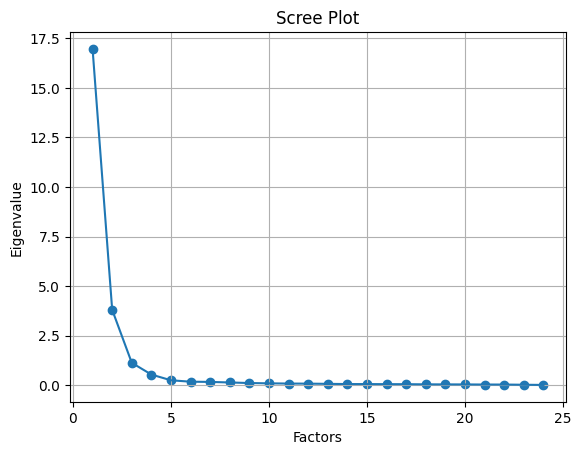

In [92]:
# 시각화 1
plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

##Step3. Factor Analysis

###Factor : 3

In [93]:
fa = FactorAnalyzer(n_factors=3, rotation = "promax")
fa.fit(data_scale)

FactorAnalyzer(rotation_kwargs={})

In [94]:
# Factor Analysis가 적용된 dataset (scaled)
X_f = fa.fit_transform(data_scale)
X_ff = pd.DataFrame(X_f[:,:4], 
                    columns = ['Factor1','Factor2','Factor3'], 
                    index = data_scale.index)
X_ff

,Factor1,Factor2,Factor3
기준일ID,,,
20220101,0.284219,0.910123,1.671668
20220102,0.388738,1.814681,2.435872
20220103,0.052524,0.693944,-0.470953
20220104,-0.093532,0.434792,-0.653194
20220105,0.280632,0.503487,-0.240980
...,...,...,...
20221227,-0.262559,0.725082,0.426679
20221228,-0.894118,0.788110,0.079297
20221229,-1.087104,0.537609,0.208603


<Axes: ylabel='시간대구분'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.ca

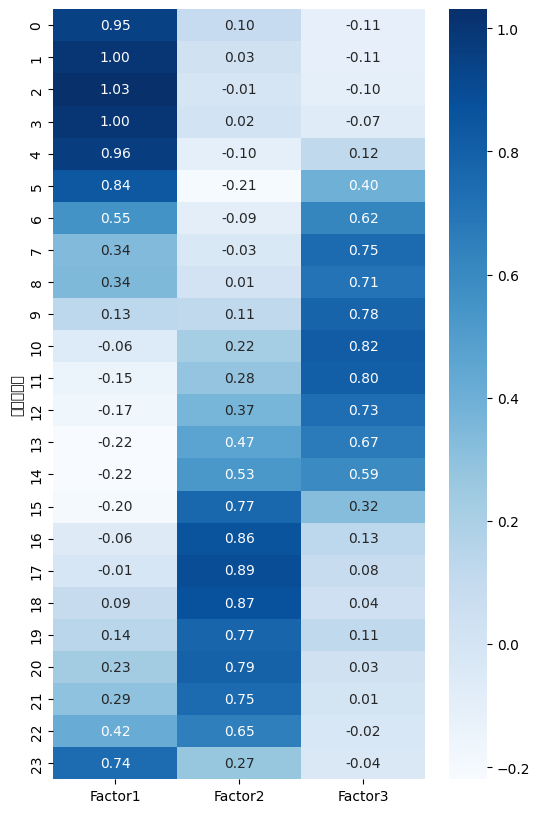

In [95]:
# 시각화 1)
fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3'],
                                 index=data_scale.columns)
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading, cmap="Blues", annot=True, fmt='.2f')

<Axes: ylabel='시간대구분'>

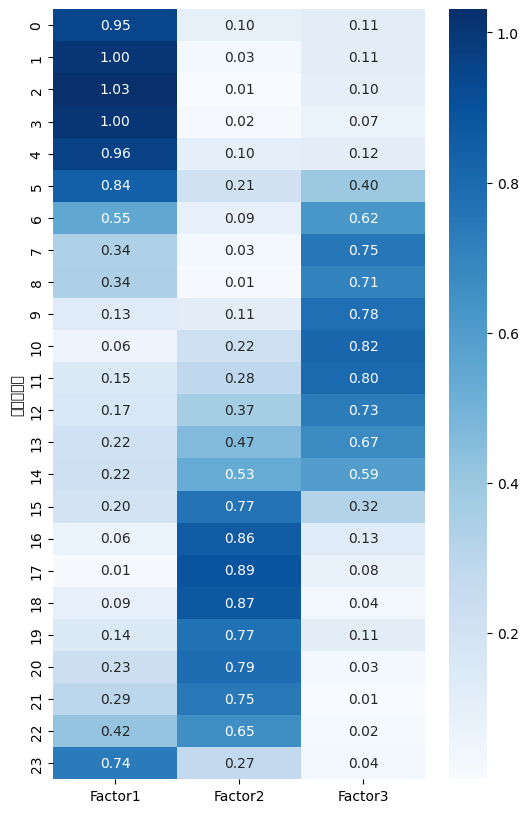

In [96]:
# 시각화 2) 절대값
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_result_loading), cmap="Blues", annot=True, fmt='.2f')

#3. Clustering


In [97]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(X_ff)
scaled = pd.DataFrame(scaled, columns = X_ff.columns)
scaled.describe() # 기초통계량

,Factor1,Factor2,Factor3
count,3.650000e+02,365.000000,3.650000e+02
mean,-2.336031e-16,0.000000,-1.946692e-16
std,1.001373e+00,1.001373,1.001373e+00
min,-3.097465e+00,-2.540259,-1.890566e+00
25%,-8.301911e-01,-0.719562,-6.808793e-01
50%,5.908395e-02,0.022158,-4.469354e-02
75%,7.767203e-01,0.736105,4.965624e-01
max,4.400355e+00,3.808509,4.389523e+00


##Ward's linkage method

### Step 1. 거리 계산에 따른 클러스터링


In [98]:
data_prime = scaled.copy()

In [99]:
# used ward's linkeage
# used euclidean distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters = linkage(y=data_prime, method='ward', metric='euclidean')

### Step 2. 군집 수 결정

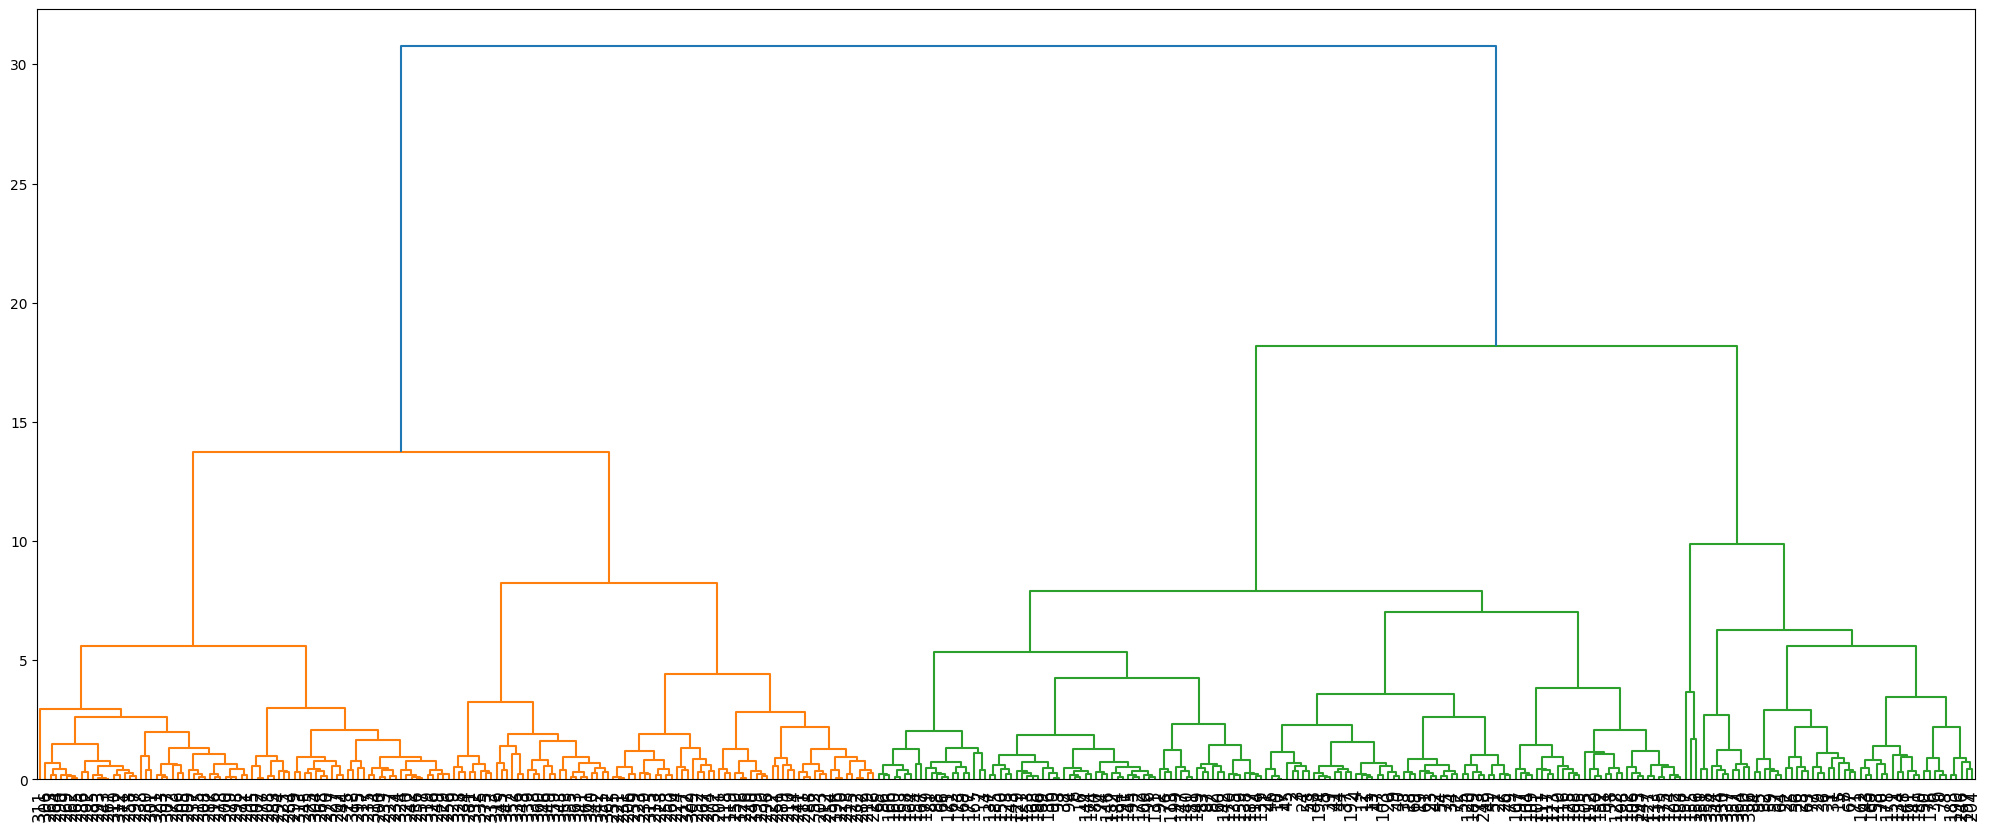

In [100]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.show()

In [101]:
cut_tree = fcluster(clusters, t=15, criterion='distance')
cut_tree

array([3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 1, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2,
       2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2,
       2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 3,
       2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [102]:
pd.Series(cut_tree).value_counts()

1    158
2    152
3     55
dtype: int64

### Step 3. Evaluation

In [103]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_prime, cut_tree)
print('Silhouette Score:', score_samples[:5], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(data_prime, cut_tree)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score))

Silhouette Score: [0.36206711 0.48557626 0.39380227 0.25813429 0.50680975] 
Silhouette Score shape: (365,) 

Silhouette Average Score:0.358


In [104]:
fa_result_loading.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='시간대구분')

In [105]:
data_prime['hc_cluster'] = cut_tree
data_prime['silhouette_coeff'] = score_samples
data_prime['date'] = X_ff.index
data_prime

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
0,0.285461,0.918678,1.687711,3,0.362067,20220101
1,0.390436,1.831740,2.459250,3,0.485576,20220102
2,0.052753,0.700467,-0.475473,2,0.393802,20220103
3,-0.093941,0.438880,-0.659463,2,0.258134,20220104
4,0.281857,0.508220,-0.243293,2,0.506810,20220105
...,...,...,...,...,...,...
360,-0.263706,0.731898,0.430774,1,-0.311401,20221227
361,-0.898023,0.795518,0.080058,1,-0.001832,20221228
362,-1.091853,0.542663,0.210605,1,0.127643,20221229
363,-0.800830,0.812245,0.256160,1,-0.065145,20221230


In [106]:
# 군집별 평균 silhouette_score 값
print(data_prime.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.347404
2    0.407215
3    0.252044
Name: silhouette_coeff, dtype: float64
표준편차: 0.07826119145944109


In [107]:
cluster_g = data_prime.groupby('hc_cluster')

In [108]:
# 군집별 통계(평균)
cluster_g.mean()

,Factor1,Factor2,Factor3,silhouette_coeff,date
hc_cluster,,,,,
1,-0.908364,-0.727664,-0.586655,0.347404,2.022096e+07
2,0.722244,0.287335,-0.017323,0.407215,2.022041e+07
3,0.613463,1.296290,1.733174,0.252044,2.022054e+07


In [109]:
# 군집별 통계(표준편차)
cluster_g.std()

,Factor1,Factor2,Factor3,silhouette_coeff,date
hc_cluster,,,,,
1,0.441779,0.769739,0.738458,0.217055,189.800922
2,0.505284,0.595893,0.483705,0.139619,194.084502
3,1.100921,0.741989,0.672440,0.201061,377.757318


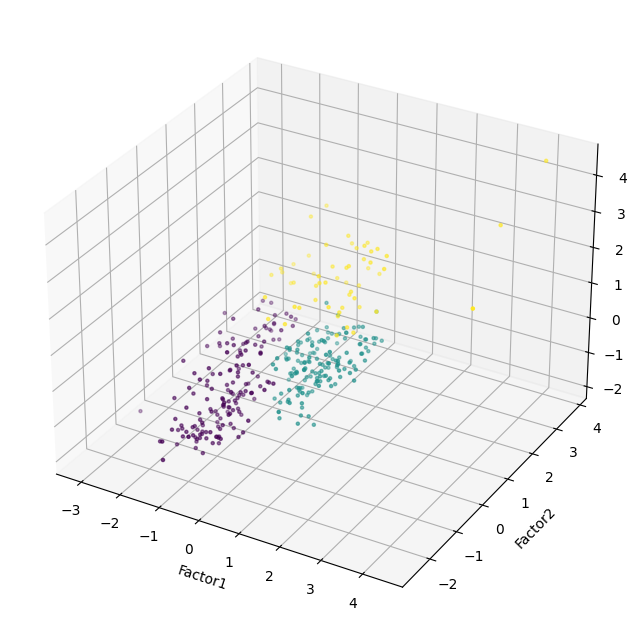

In [110]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_prime['Factor1'], data_prime['Factor2'], data_prime['Factor3'], s=5, c = data_prime['hc_cluster'])
ax.set_xlabel('Factor1', rotation=150)
ax.set_ylabel('Factor2')
ax.set_zlabel(r'Factor3', rotation=60)
plt.show()

In [111]:
cluster1 = data_prime[data_prime['hc_cluster'] == 1]
cluster2 = data_prime[data_prime['hc_cluster'] == 2]
cluster3 = data_prime[data_prime['hc_cluster'] == 3]

In [112]:
cluster1

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
25,-0.638025,-0.153056,-1.173412,1,0.305909,20220126
52,-0.385995,-0.548672,-0.062544,1,0.196914,20220222
118,0.174530,-0.919777,-0.105167,1,-0.036357,20220429
119,0.211005,-0.653091,-0.100462,1,-0.172649,20220430
126,-0.107182,-0.357824,-0.383974,1,-0.018716,20220507
...,...,...,...,...,...,...
359,-0.567009,0.934896,0.545309,1,-0.200907,20221226
360,-0.263706,0.731898,0.430774,1,-0.311401,20221227
361,-0.898023,0.795518,0.080058,1,-0.001832,20221228
362,-1.091853,0.542663,0.210605,1,0.127643,20221229


In [113]:
cluster2

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
2,0.052753,0.700467,-0.475473,2,0.393802,20220103
3,-0.093941,0.438880,-0.659463,2,0.258134,20220104
4,0.281857,0.508220,-0.243293,2,0.506810,20220105
5,0.281961,0.202373,-0.901935,2,0.325678,20220106
6,0.807586,0.640715,-0.097506,2,0.590188,20220107
...,...,...,...,...,...,...
194,0.195153,0.289117,-0.941748,2,0.296161,20220714
195,0.199919,-0.399509,-0.816725,2,0.115505,20220715
198,0.682627,-0.748377,-0.418136,2,0.293029,20220718
247,0.233284,-0.590737,0.275057,2,0.244838,20220905


In [114]:
cluster3

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
0,0.285461,0.918678,1.687711,3,0.362067,20220101
1,0.390436,1.831740,2.459250,3,0.485576,20220102
8,0.701097,2.094938,2.194244,3,0.470280,20220109
15,0.269447,2.151635,2.008695,3,0.457206,20220116
22,0.237091,1.647931,1.342298,3,0.356196,20220123
28,0.683282,2.151409,1.437379,3,0.372344,20220129
29,0.633396,1.404508,1.912509,3,0.467070,20220130
30,0.371436,0.767035,2.005570,3,0.384367,20220131
31,0.060251,1.498218,2.315281,3,0.471579,20220201
32,0.902340,1.671915,2.438085,3,0.479226,20220202


# 시각화

In [115]:
pivot_22_itw = data_22_gr.pivot(index='기준일ID', columns='시간대구분', values='60세이상생활인구수')

In [116]:
pivot_22_itw

시간대구분,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
기준일ID,,,,,,,,,,,,,,,,,,,,,
20220101,8166.0346,8193.5228,8204.0520,8203.4646,8214.8533,8053.4609,7990.6535,7982.8374,8004.9906,8007.8686,...,7640.5335,7736.7476,7953.4682,8102.2306,8136.7528,8161.7903,8036.3660,7995.0099,7981.2181,8194.6380
20220102,8180.5444,8213.4312,8182.2988,8267.6241,8207.1852,8121.1908,8137.9135,8151.3637,8088.6515,8143.1505,...,8106.0480,8088.5046,8093.3192,8218.0672,8404.8496,8301.7438,8234.8953,8195.8860,8231.2306,8197.3456
20220103,8236.5208,8267.0309,8272.4487,8186.9043,8067.0511,7720.2986,7565.9273,7455.3660,7563.3811,7471.4169,...,7224.9081,7497.3909,7760.9065,7814.5280,8011.8310,8041.2113,7995.1129,7950.0809,8055.6230,8213.9676
20220104,8214.1891,8152.9119,8154.0270,8173.8936,8076.8330,7842.0224,7545.0062,7403.4865,7297.4979,7411.5437,...,7174.9479,7462.2790,7570.4989,7743.2545,7829.1221,7914.2657,7919.0232,8096.3883,8147.3621,8192.2373
20220105,8204.5351,8270.5952,8247.6959,8203.2826,8052.3486,7940.6503,7718.4059,7608.4141,7697.0760,7337.5708,...,7154.4297,7521.8355,7665.8090,7757.9347,7823.6830,8009.3637,8034.2435,8037.4987,8168.0236,8338.7132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227,8180.2162,8205.6241,8125.9387,8153.2966,7902.2046,7919.9874,7674.9374,7689.7756,7610.8675,7545.3449,...,7369.9308,7581.4861,7886.6711,7961.5204,7959.6329,7887.1716,7955.8805,7997.0579,8010.3490,8092.2110
20221228,8124.9246,8073.0881,7970.1931,7940.1167,7875.0102,7779.9907,7616.8094,7543.7854,7481.9617,7337.4994,...,7590.4909,7731.7134,7839.0470,7976.2122,8081.2164,7905.0933,7935.9513,7842.6654,7884.1507,8060.5504
20221229,8083.9041,7956.9080,7988.2062,7999.0415,7860.4277,7712.6365,7427.3670,7376.0958,7655.2824,7463.7737,...,7580.0861,7638.9323,7676.6008,7897.6137,8071.0607,7901.9501,7767.2692,7814.8341,7672.7871,8007.1282


## cluster1~3


In [117]:
cluster1

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
25,-0.638025,-0.153056,-1.173412,1,0.305909,20220126
52,-0.385995,-0.548672,-0.062544,1,0.196914,20220222
118,0.174530,-0.919777,-0.105167,1,-0.036357,20220429
119,0.211005,-0.653091,-0.100462,1,-0.172649,20220430
126,-0.107182,-0.357824,-0.383974,1,-0.018716,20220507
...,...,...,...,...,...,...
359,-0.567009,0.934896,0.545309,1,-0.200907,20221226
360,-0.263706,0.731898,0.430774,1,-0.311401,20221227
361,-0.898023,0.795518,0.080058,1,-0.001832,20221228
362,-1.091853,0.542663,0.210605,1,0.127643,20221229


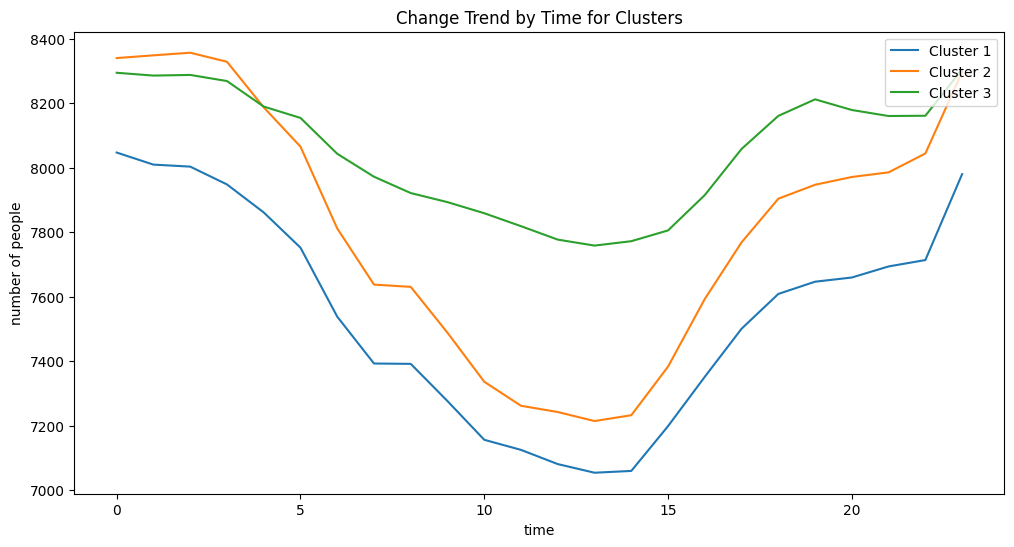

In [118]:
import matplotlib.pyplot as plt

time_range = range(24)

#cluster1부터 3까지의 데이터와 날짜들 추출
clusters = [cluster1, cluster2, cluster3]
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_dates = [cluster['date'] for cluster in clusters]
cluster_data = [pivot_22_itw.loc[dates] for dates in cluster_dates]

#그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for label, data in zip(cluster_labels, cluster_data):
  change_trend = data.mean()
  ax.plot(time_range, change_trend, label=label)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Clusters')
ax.legend(loc='upper right')
plt.show()

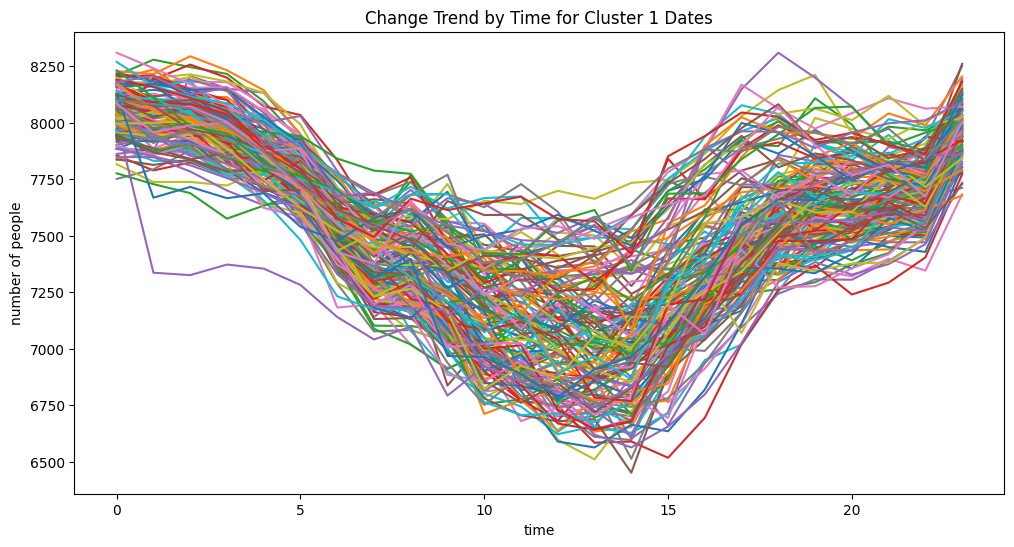

In [119]:
import matplotlib.pyplot as plt

# cluster1에 해당하는 날짜들 추출
cluster1_dates = cluster1['date']

# pivot_22_itw에서 cluster1에 해당하는 날짜들의 데이터 추출
cluster1_data = pivot_22_itw.loc[cluster1_dates]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for date, data in cluster1_data.iterrows():
    change_trend = data.values
    ax.plot(time_range, change_trend, label=date)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Cluster 1 Dates')
plt.show()

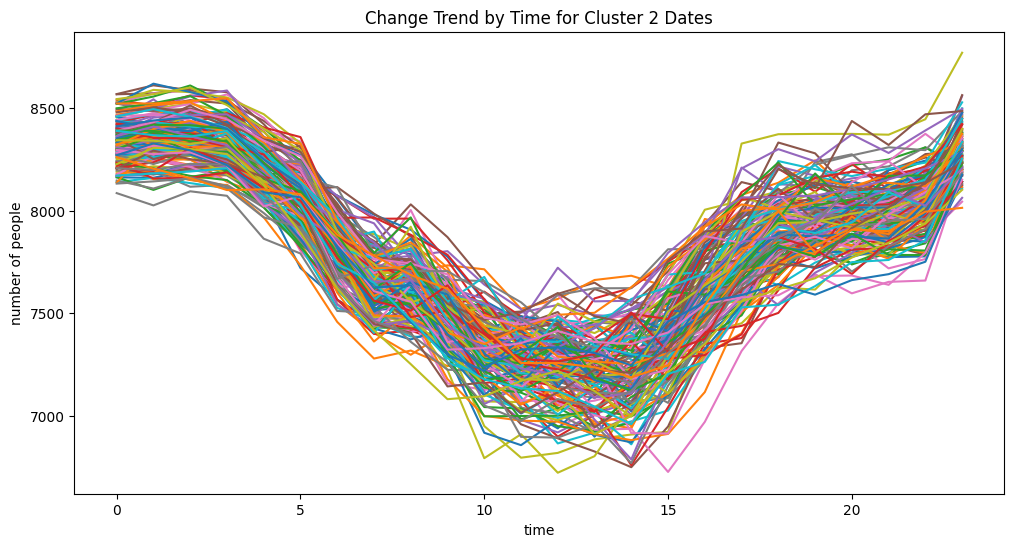

In [120]:
import matplotlib.pyplot as plt

# cluster2에 해당하는 날짜들 추출
cluster2_dates = cluster2['date']

# pivot_22_itw에서 cluster2에 해당하는 날짜들의 데이터 추출
cluster2_data = pivot_22_itw.loc[cluster2_dates]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for date, data in cluster2_data.iterrows():
    change_trend = data.values
    ax.plot(time_range, change_trend, label=date)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Cluster 2 Dates')
plt.show()

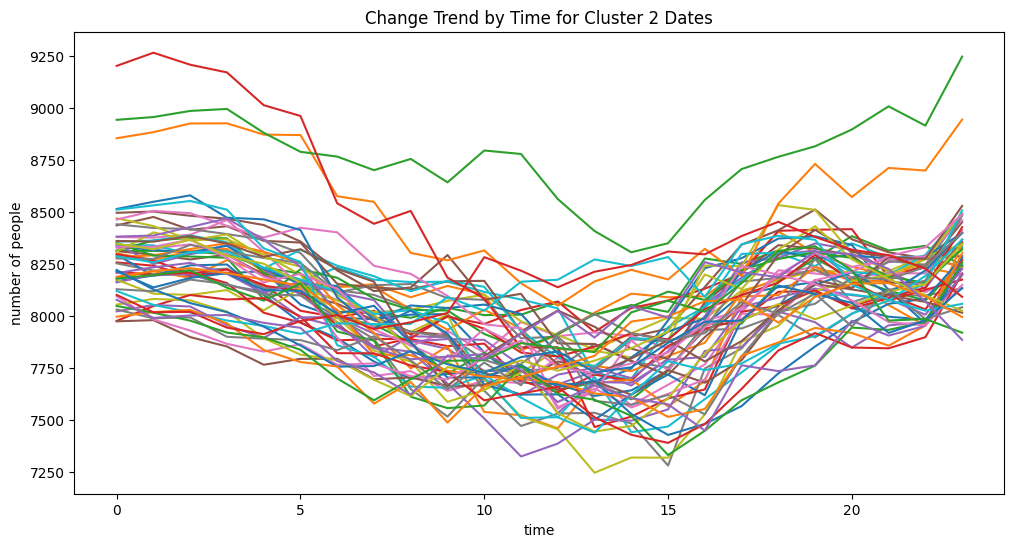

In [121]:
import matplotlib.pyplot as plt

# cluster3에 해당하는 날짜들 추출
cluster3_dates = cluster3['date']

# pivot_22_itw에서 cluster3에 해당하는 날짜들의 데이터 추출
cluster3_data = pivot_22_itw.loc[cluster3_dates]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for date, data in cluster3_data.iterrows():
    change_trend = data.values
    ax.plot(time_range, change_trend, label=date)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Cluster 2 Dates')
plt.show()

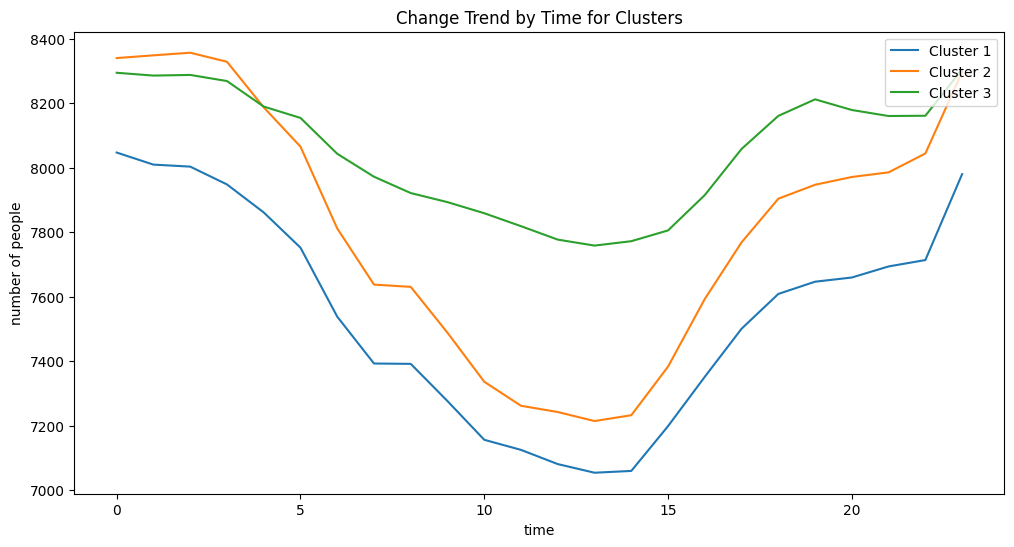

In [122]:
import matplotlib.pyplot as plt

time_range = range(24)

#cluster1부터 5까지의 데이터와 날짜들 추출
clusters = [cluster1, cluster2, cluster3]
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_dates = [cluster['date'] for cluster in clusters]
cluster_data = [pivot_22_itw.loc[dates] for dates in cluster_dates]

#그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for label, data in zip(cluster_labels, cluster_data):
  change_trend = data.mean()
  ax.plot(time_range, change_trend, label=label)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Clusters')
ax.legend(loc='upper right')
plt.show()

In [123]:
pd.DataFrame(cluster1['date']) #일요일, 명절, 공휴일 등

,date
25,20220126
52,20220222
118,20220429
119,20220430
126,20220507
...,...
359,20221226
360,20221227
361,20221228
362,20221229


In [124]:
pd.DataFrame(cluster2['date'])

,date
2,20220103
3,20220104
4,20220105
5,20220106
6,20220107
...,...
194,20220714
195,20220715
198,20220718
247,20220905


In [125]:
pd.DataFrame(cluster3['date'])

,date
0,20220101
1,20220102
8,20220109
15,20220116
22,20220123
28,20220129
29,20220130
30,20220131
31,20220201
32,20220202


In [126]:
data_22_gr_

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
384,20220101,0,11305555,28225.0244,782.5948,432.6690,730.6148,648.7153,901.8049,785.2113,...,769.9918,788.6660,1015.6954,863.5931,1236.6788,1223.5890,1367.9785,1186.0067,882.4522,2689.7824
705,20220101,1,11305555,28037.2932,715.6002,395.6300,731.6411,673.9641,887.6676,788.4051,...,736.7004,783.8809,1025.3316,885.1580,1211.1335,1199.4253,1364.5971,1180.6930,907.2629,2685.3744
1036,20220101,2,11305555,28153.0422,705.5369,390.0664,755.4677,633.7762,885.7771,796.0430,...,747.5702,797.0133,1053.2232,878.5263,1227.9428,1194.8281,1346.0646,1183.0057,902.9422,2681.2836
1324,20220101,3,11305555,28269.1632,723.7052,400.1111,764.7520,650.7923,891.8627,795.4410,...,755.6700,801.2846,1063.7417,892.4147,1229.2634,1213.8276,1336.3392,1174.9180,899.6781,2728.0508
1813,20220101,4,11305555,28066.7696,731.3587,404.3427,730.2358,662.3148,882.6439,780.0439,...,744.5908,789.2456,1061.2065,865.1202,1188.1046,1193.7141,1300.7310,1162.2154,898.1351,2720.9031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712430,20221231,19,11305555,28008.3117,914.5259,505.6094,714.1551,725.5169,794.4926,756.4034,...,692.9697,719.6354,960.4849,929.3647,1215.1297,1166.6772,1318.7409,1101.9151,962.6870,2729.1494
3712933,20221231,20,11305555,27690.6745,847.8727,468.7596,699.2489,700.7183,747.3516,782.8631,...,673.2455,712.7919,992.3988,933.8447,1196.8517,1144.7033,1276.6265,1119.2226,938.2616,2738.2612
3713289,20221231,21,11305555,27871.2507,854.7414,472.5565,710.6160,661.1512,761.6799,758.9608,...,719.4835,693.6340,1005.2551,934.3492,1229.0468,1175.5213,1291.0995,1119.3943,959.0416,2698.6341
3713476,20221231,22,11305555,27892.5833,918.6277,507.8772,727.4949,663.5975,748.4156,804.8052,...,746.6236,687.3330,949.6462,975.7392,1223.5073,1128.7098,1299.1334,1121.2350,949.0799,2595.2011


In [127]:
data_22_gr.columns

Index(['기준일ID', '시간대구분', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자70세이상생활인구수',
       '60세이상생활인구수'],
      dtype='object')

In [128]:
data_22_gr

,기준일ID,시간대구분,여자60세부터64세생활인구수,여자65세부터69세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자70세이상생활인구수,60세이상생활인구수
384,20220101,0,1186.0067,882.4522,979.2334,749.8935,1678.6664,2689.7824,8166.0346
705,20220101,1,1180.6930,907.2629,988.2645,742.9045,1689.0235,2685.3744,8193.5228
1036,20220101,2,1183.0057,902.9422,1002.0277,736.2424,1698.5504,2681.2836,8204.0520
1324,20220101,3,1174.9180,899.6781,979.3853,728.3796,1693.0528,2728.0508,8203.4646
1813,20220101,4,1162.2154,898.1351,975.4384,740.5416,1717.6197,2720.9031,8214.8533
...,...,...,...,...,...,...,...,...,...
3712430,20221231,19,1101.9151,962.6870,983.5103,794.3787,1737.5012,2729.1494,8309.1417
3712933,20221231,20,1119.2226,938.2616,970.2569,791.7249,1738.6698,2738.2612,8296.3970
3713289,20221231,21,1119.3943,959.0416,972.7157,804.1006,1671.1651,2698.6341,8225.0514
3713476,20221231,22,1121.2350,949.0799,984.8288,793.6527,1624.1128,2595.2011,8068.1103


In [129]:
pivot_22_gr2 = data_22_gr.pivot(index='시간대구분', columns='기준일ID', values='60세이상생활인구수')


In [130]:
pivot_22_gr2

기준일ID,20220101,20220102,20220103,20220104,20220105,20220106,20220107,20220108,20220109,20220110,...,20221222,20221223,20221224,20221225,20221226,20221227,20221228,20221229,20221230,20221231
시간대구분,,,,,,,,,,,,,,,,,,,,,
0,8166.0346,8180.5444,8236.5208,8214.1891,8204.5351,8303.3116,8372.5930,8261.1118,8311.0288,8315.3793,...,8230.8530,7995.0162,8046.5686,8099.9110,8189.4998,8180.2162,8124.9246,8083.9041,8100.2882,8076.5575
1,8193.5228,8213.4312,8267.0309,8152.9119,8270.5952,8290.8951,8329.9144,8280.3112,8311.9320,8305.2258,...,8111.2429,8017.2659,8014.4593,8016.2434,8157.5534,8205.6241,8073.0881,7956.9080,8081.5687,7989.2938
2,8204.0520,8182.2988,8272.4487,8154.0270,8247.6959,8294.3353,8393.9621,8293.6374,8308.5794,8247.6823,...,7985.3269,8027.5865,7976.0540,8018.6389,8108.9400,8125.9387,7970.1931,7988.2062,8063.1831,8000.9622
3,8203.4646,8267.6241,8186.9043,8173.8936,8203.2826,8225.2271,8385.0510,8341.9375,8295.6699,8198.1539,...,7951.9709,7963.1394,7918.6836,7942.4910,8051.7278,8153.2966,7940.1167,7999.0415,7986.9914,8002.9794
4,8214.8533,8207.1852,8067.0511,8076.8330,8052.3486,8041.0071,8171.0320,8175.6869,8230.3733,8113.5869,...,7821.3854,7834.8167,7895.5049,7911.1591,7902.8501,7902.2046,7875.0102,7860.4277,7871.4144,7965.5685
5,8053.4609,8121.1908,7720.2986,7842.0224,7940.6503,7895.8464,8028.0967,8040.1444,8203.9194,7803.5335,...,7761.4088,7777.0209,7835.9925,7974.2899,7794.9202,7919.9874,7779.9907,7712.6365,7719.8535,7941.5169
6,7990.6535,8137.9135,7565.9273,7545.0062,7718.4059,7565.4206,7838.0726,7827.6429,8018.7989,7613.3317,...,7703.3648,7755.5690,7697.9082,8003.0767,7574.7681,7674.9374,7616.8094,7427.3670,7607.9538,7781.7806
7,7982.8374,8151.3637,7455.3660,7403.4865,7608.4141,7398.6120,7645.5580,7731.9425,8015.1246,7469.4826,...,7570.8453,7576.7098,7592.8777,7935.5349,7494.5467,7689.7756,7543.7854,7376.0958,7537.7530,7726.9794
8,8004.9906,8088.6515,7563.3811,7297.4979,7697.0760,7415.9161,7652.1056,7703.8796,7989.7813,7409.1914,...,7517.9214,7680.5770,7694.3145,7968.2359,7663.9979,7610.8675,7481.9617,7655.2824,7621.2920,7619.9828


In [131]:
date_3 = cluster1['date']

clu3_date = pivot_22_gr2[pivot_22_gr2.iloc[:, 0:].isin(pivot_22_gr2[date_3])]
clu3_date = clu3_date.dropna(axis=1) 
max_values2 = clu3_date.max()
max_indices2= clu3_date.idxmax()
result = pd.DataFrame({'생황인구 최댓값': max_values2, '시간': max_indices2})
Clu3_mean = result['시간'].mean()
Clu3_mean

5.6835443037974684